# Class 21: Regression

1. Log onto prismia
1. Share a topic you're most interested in applying data science to in the zoom chat

## Regression Introduction


What is the difference in data that's well suited for regression vs classification
- [ ] regression is better for more features
- [ ] regression can work with categorical features
- [x] regression uses a continuous target variable

Explanation: the difference is that for regression we can use continuous target variables.  Either classification or regression can work with high dimensional data (dimension refers to the number of features). Either can also work with a mixture of categorical or continuous valued features.

In [1]:
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
sns.set_theme(font_scale=2)

Today we will work with the [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) and we'll use the `sklearn.datasets` module to load it.  When we load data this way, it gets loaded as a `numpy` array

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)

Since it's not a `pandas.DataFrame` we don't have the head method, but we can index using square brackets.

In [3]:
diabetes_X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

and the same for the labels.

In [4]:
diabetes_y[:5]

array([151.,  75., 141., 206., 135.])

Since this data is not in any sorted order, we can split into test and train using indexing instead of the `test_train_split` function.  This way we all get the same split, without setting the `ranomd_seed` parameter.  In most cases, it's best to use the function, but it's good to know different ways to do things.

We'll start by using only one feature, the one in column 8.

In [5]:
diabetes_X_train = diabetes_X[:-20,8]
diabetes_X_test = diabetes_X[-20:,8]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

Now we can instantiate the object

In [6]:
regr = linear_model.LinearRegression()

All `sklearn` estimators have the same methods, and all take any specialized parameters in the constructor.  We've used the default values here, but this is an important design feature of scikit learn, because it makes their pipeline infrastructure and functions for cross validation work.

In [7]:
regr.fit(diabetes_X_train,diabetes_y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.01990842 -0.06832974  0.00286377  0.02269202 -0.03199144 -0.04118039
 -0.06291295 -0.03581673 -0.01495648  0.06773633 -0.06291295 -0.09643322
 -0.03075121  0.03839325 -0.03199144  0.03605579  0.05228     0.02736771
 -0.01811827 -0.00894402 -0.01190068 -0.07212845 -0.0611766   0.13359898
 -0.02595242  0.01919903 -0.0425721  -0.01599827 -0.00060925  0.0594238
 -0.02712865 -0.03712835  0.00027149 -0.01811827 -0.0594727   0.02131085
  0.054724    0.01703713  0.07142403  0.01919903  0.01255315 -0.04986847
 -0.00991896 -0.0425721   0.03243323 -0.01495648 -0.0079794  -0.01811827
 -0.0594727   0.03546194 -0.02139368 -0.00239668 -0.01811827 -0.03324879
 -0.04118039 -0.06648815  0.03365681 -0.05615757 -0.00060925  0.03839325
 -0.05140054  0.0366458  -0.08238148 -0.03075121 -0.01919705  0.0423449
  0.00027149 -0.01190068 -0.01290794 -0.05140054 -0.06291295  0.02671426
  0.08449528 -0.00514531  0.00371174  0.00620932 -0.03075121 -0.07408887
  0.04289569 -0.06832974  0.02539313 -0.00608025 -0.07020931 -0.01599827
 -0.06832974 -0.04118039 -0.09643322  0.04289569 -0.03452372 -0.02479119
 -0.07212845  0.03723201  0.01255315 -0.03324879 -0.04118039  0.0011438
  0.06078775  0.00286377 -0.00608025  0.0117839   0.03723201 -0.03075121
 -0.00514531 -0.01090444 -0.0611766  -0.01090444 -0.0594727  -0.05295879
  0.04560081 -0.02595242 -0.12609739 -0.02364456 -0.02364456  0.04666077
  0.09924023  0.08379677  0.02200405  0.07912108  0.02061233  0.02736771
 -0.03980959  0.01990842  0.03243323  0.01556684 -0.01599827  0.08058546
 -0.09393565  0.00455189 -0.03075121  0.03896837  0.02269202 -0.04687948
 -0.01290794 -0.07212845 -0.02712865  0.05078151 -0.06648815  0.01703713
  0.02801651  0.054724   -0.03324879  0.04506617  0.04560081 -0.04118039
  0.00620932 -0.01599827  0.01482271  0.02605609 -0.03075121  0.06123791
 -0.01919705 -0.00894402  0.02671426 -0.03452372  0.00864028  0.03781448
 -0.02139368  0.01022564 -0.03075121  0.0423449  -0.03581673  0.07573759
 -0.03075121 -0.02364456  0.01776348 -0.05615757 -0.07814091  0.07763279
  0.06898221  0.13359898 -0.09643322 -0.05140054  0.07341008 -0.01811827
  0.01703713 -0.02712865 -0.00330371  0.07222365 -0.04836172  0.01407245
  0.01630495 -0.02595242  0.01556684  0.01556684  0.03723201  0.06731722
  0.04718617 -0.08682899 -0.00149859 -0.02028875  0.02337484  0.01022564
 -0.02952762  0.03953988  0.00200784  0.00783714 -0.03324879  0.01331597
 -0.07408887  0.08989869 -0.02832024 -0.05295879  0.08449528  0.02539313
  0.00200784  0.06345592  0.00943641  0.04613233 -0.00149859 -0.01190068
 -0.03324879 -0.02251217 -0.00060925 -0.02251217 -0.03980959  0.0366458
  0.04560081  0.03365681  0.00702686  0.0011438  -0.10164355  0.0011438
  0.0011438  -0.01811827 -0.03581673  0.06301662 -0.03980959 -0.03845911
 -0.02712865 -0.02364456  0.05027649  0.00943641  0.02405258 -0.02595242
  0.06432823 -0.00514531  0.04067226 -0.04836172  0.0110081   0.06604821
  0.03365681 -0.02952762 -0.07814091 -0.0439854  -0.0439854  -0.04986847
  0.04506617 -0.01090444  0.06389312  0.0702113   0.07573759  0.08449528
 -0.00421986  0.03486419  0.12005338 -0.00330371  0.02801651 -0.00514531
 -0.03712835 -0.0439854  -0.08023654 -0.01290794  0.03486419 -0.07212845
 -0.0594727   0.01482271 -0.08682899  0.02337484  0.02930041 -0.01190068
  0.00864028 -0.01811827 -0.01811827  0.10635428  0.01556684  0.0110081
  0.05757286 -0.02139368  0.0011438  -0.01599827  0.01630495  0.02405258
 -0.00894402 -0.06832974  0.00286377  0.05988072 -0.01919705  0.03243323
 -0.07020931  0.06123791  0.02993565  0.05803913 -0.06291295 -0.05454415
 -0.07408887  0.01630495 -0.05615757 -0.06468302 -0.03075121 -0.02595242
  0.04289569 -0.02139368  0.03119299  0.07380215 -0.02251217  0.01776348
 -0.03980959  0.02337484 -0.0611766   0.02671426 -0.01811827  0.01255315
 -0.03845911  0.05520504 -0.01190068 -0.01090444  0.07496834  0.02472532
  0.00943641  0.02866072  0.03304707  0.09864637  0.13339573  0.12901941
  0.06604821  0.08449528  0.02993565 -0.00060925 -0.00149859 -0.0170521
 -0.02364456 -0.04118039  0.05710419  0.02930041 -0.06291295 -0.05140054
  0.08094791  0.00538437 -0.02251217  0.04344317 -0.03581673 -0.02479119
 -0.02364456 -0.05780007  0.00702686 -0.00060925  0.06257518  0.00371174
 -0.01090444 -0.0611766   0.0702113  -0.05780007 -0.02028875  0.13237265
  0.07419254 -0.03324879 -0.02832024  0.04976866 -0.08238148  0.01482271
  0.01331597 -0.07212845  0.00371174  0.01919903  0.01482271  0.03119299
  0.07102158  0.03365681  0.08553312 -0.00514531 -0.0611766   0.11934399
 -0.01090444 -0.0425721  -0.00060925  0.02801651  0.04613233  0.00943641
  0.02269202 -0.04687948 -0.05140054 -0.01290794  0.10413761 -0.01811827
  0.02405258 -0.02595242 -0.03075121 -0.10436482  0.02671426 -0.04118039
  0.10329226 -0.08913686 -0.04118039 -0.03980959  0.13008061  0.03181522
 -0.09643322  0.03605579  0.04506617  0.03953988 -0.03452372 -0.0425721
  0.01556684  0.06168585 -0.02712865  0.0366458  -0.05615757 -0.04836172
  0.05803913  0.03056649  0.06604821 -0.05140054  0.00620932 -0.03581673
  0.054724    0.01482271 -0.02952762 -0.04687948 -0.02139368 -0.07408887
 -0.03324879  0.04976866].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

we get an error because the training data  (`diabetes_X_train`) is only one dimensional.
Scikit learn's `fit` methods require a 2d-array even if fitting with only one feature.

In [8]:
diabetes_X_train.shape

(422,)

we can use `np.newaxis` to fix this problem.

In [9]:
diabetes_X_train = diabetes_X[:-20,np.newaxis,8]
diabetes_X_test = diabetes_X[-20:,np.newaxis,8]

and check the shape

In [10]:
diabetes_X_train.shape

(422, 1)

It's the same shape, in a mathematical sense, but in terms of the underlying data structure this one has a second dimension (it's just only 1 long) in that dimension.  This is tricky, but an important thing to know how to fix.

Now we can fit our model

In [11]:
regr.fit(diabetes_X_train,diabetes_y_train)

LinearRegression()

and examine the coefficient

In [12]:
regr.coef_

array([900.39171612])

and make predictions with the model

In [13]:
diabetes_y_pred = regr.predict(diabetes_X_test)

we can evaluate with `mean_squared_error` (see below for more detail), which is as it's named. It computes the error in each prediction (`y_pred- y_true`), squares it, then averages them all together.

In [14]:
mean_squared_error(diabetes_y_test,diabetes_y_pred)

2923.342534244987

We can also use the $r^2$ score, which is more normalized, it's best value is 1.

In [15]:
r2_score(diabetes_y_test,diabetes_y_pred)

0.3948984231023219

To get an even better idea, we can plot.  We'll use `matplotlib` to plot, since our data is not in a DataFrame. `seaborn` and `pandas` use `matplotlib` under the hood, so it will have a lot of familiar methods, but it takes a lot more work to build complicated figures with `matplotlib`. The alias `plt` is used by convention for the `pyplot` module of `matplotlib`

In [16]:
import matplotlib.pyplot as plt

Then we can scatter plot the true data and make a line of the predictions in blue.

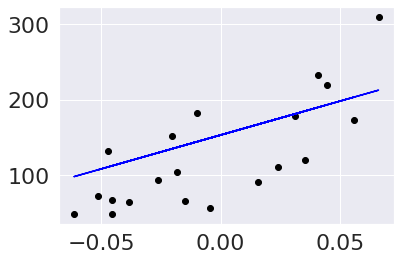

In [17]:
plt.scatter(diabetes_X_test,diabetes_y_test, color='black')
plt.plot(diabetes_X_test,diabetes_y_pred, color='blue')

We can modify this plot to highlight the errors, too.
````{margin}
```{tip}
the semicolon here prevents it from printing out the axis information for each element of the list comprehension
```
````

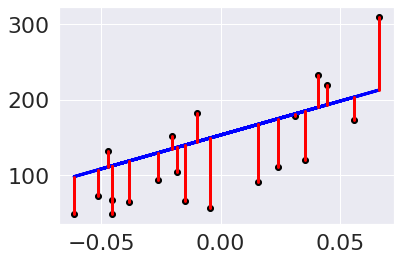

In [18]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

[plt.plot([x,x],[yp,yt], color='red', linewidth=3)
                 for x, yp, yt in zip(diabetes_X_test, diabetes_y_pred,diabetes_y_test)];

```{admonition} Try it yourself

Fit another regression model to this data that uses all of the feautures instead of only one
```

In [19]:
diabetes_X_train2 = diabetes_X[:-20]
diabetes_X_test2 = diabetes_X[-20:]
diabetes_y_train2 = diabetes_y[:-20]
diabetes_y_test2 = diabetes_y[-20:]

regr2 = linear_model.LinearRegression()
regr2.fit(diabetes_X_train2,diabetes_y_train2)
diabetes_y_pred2 = regr2.predict(diabetes_X_test2)
r2_score(diabetes_y_test2,diabetes_y_pred2)

0.5850753022690575

This does better on $r^2$, let's also check the mse.

In [20]:
mean_squared_error(diabetes_y_test2,diabetes_y_pred2)

2004.5676026898207

## More practice

1. try out `regr2.score` what does scikite learn use for the score for `linear_model.LinearRegression` models?
1. repeat the above using `test_train_split`, can you make the test size 20 samples again?
1. try another single feature model using a different feature than we did above. Is your new feature a better or worse predictor? Make plots to compare and try to build intuition for the performance metrics geometrically.



## Questions After class

### What is considered a good r2 value?

This will depend on context in some sense. You can read about it in the [`r2_score` docs]() and the corresponding [wikipedia page](https://en.wikipedia.org/wiki/Coefficient_of_determination)

Here's a quick visual of what different r2 score values lookl like. I simulated data by ranomly picking 10 points, then made the "predicted" y values by picking a slope of 3 and computing `3*x`.  Then I simulated various levels of noise, by sampling noise and multiplying the same noise vector by different scales and adding all of those to a data frame with the column name the r score for if that column of target values was the truth.

Then I added some columns of y values that were with different slopes and different functions of x.  These all have the small amount of noise.


I used the pandas `melt` method to restructure the DataFrame so that I could use `FaceGrid` with `col` and `col_wrap` to show all of the results.

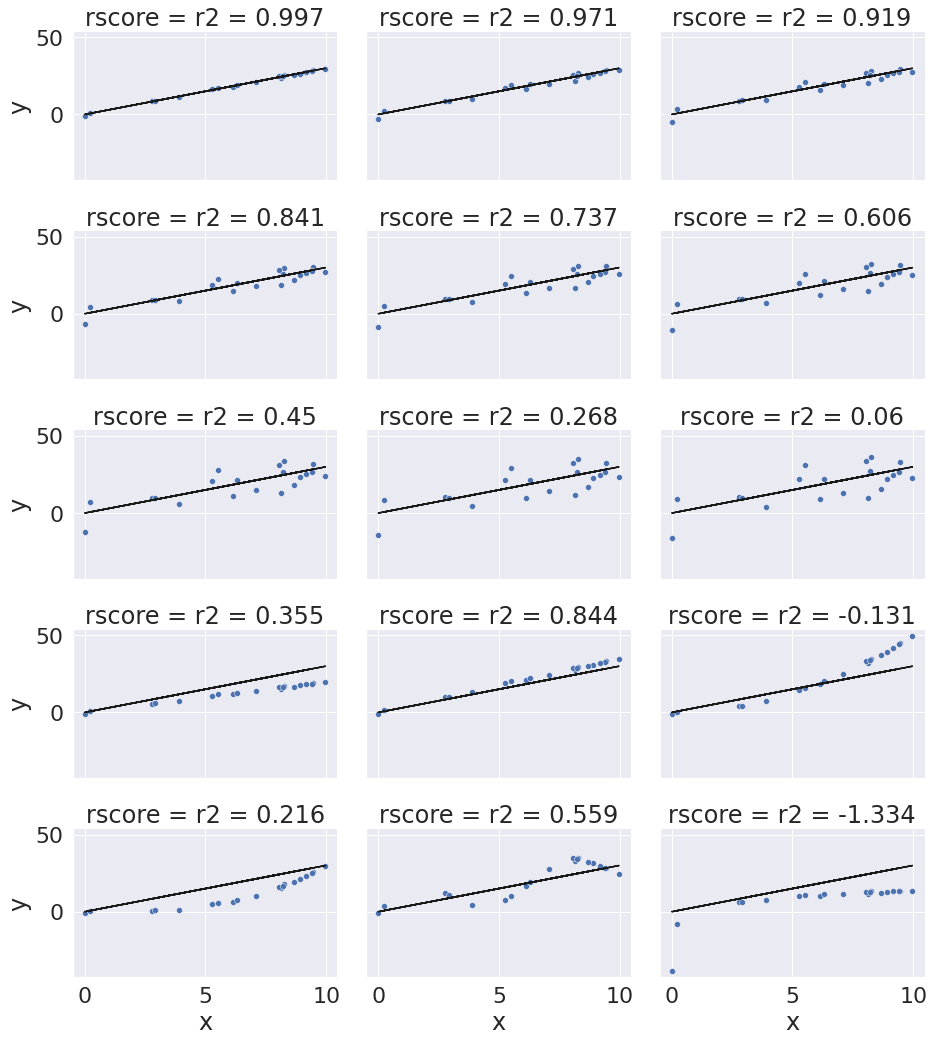

In [21]:
x = 10*np.random.random(20)
y_pred = 3*x
ex_df = pd.DataFrame(data = x,columns = ['x'])
ex_df['y_pred'] = y_pred
n_levels = range(1,18,2)
noise = (np.random.random(20)-.5)*2
for n in n_levels:
    y_true = y_pred + n* noise
    ex_df['r2 = '+ str(np.round(r2_score(y_pred,y_true),3))] = y_true

f_x_list = [2*x,3.5*x,.5*x**2, .03*x**3, 10*np.sin(x)+x*3,3*np.log(x**2)]
for fx in f_x_list:
    y_true = fx + noise
    ex_df['r2 = '+ str(np.round(r2_score(y_pred,y_true),3))] = y_true    

xy_df = ex_df.melt(id_vars=['x','y_pred'],var_name='rscore',value_name='y')
# sns.lmplot(x='x',y='y', data = xy_df,col='rscore',col_wrap=3,)
g = sns.FacetGrid(data = xy_df,col='rscore',col_wrap=3,aspect=1.5,height=3)
g.map(plt.plot, 'x','y_pred',color='k')
g.map(sns.scatterplot, "x", "y",)

The `r2_score` alone doesn't tell the whole picture. We'll also often want to analyze the errors in greater detail.  We'll look at how to do that to investigate how the model really fits more later this week.

### Can some of the methods applied in regression can be used in the same format in classification?

the `sklearn` estimator objects all have the same methods, you can see details on the API on the [sklearn developer page](https://scikit-learn.org/stable/developers/develop.html).


### Why couldn't we use `train_test_split` for this model?

We absolutely can. Splitting this way was to show *another* way to split the data, and point out under which conditions this way is ok.

### I am still confused about machine learning

Try reading the notes from the [introduction class](2020-10-12).

The scikit-learn [choose an estimator](https://scikit-learn.org/stable/_static/ml_map.png) graph can also be helpful.



### What is the difference between test and train data?

We split data, sample-wise, into two pieces, in order to evaluate what we are doing.

There is nothing inherently different between test data and train data.  In fact, by applying the model we learned with the training data to predict on the test data we are assuming that they are very similar.   

We split our data so that we can see how well we expect our trained model to work on new data, since the goal is to send our learned model into the world and use it for something else.  For example, a model fit on today's data, about diabetes, might be used to predict which patients are going to have the most severe disease in a year based on their stats today and then enroll them in a program to help them learn to better manage their diabetes.

The test set is meant to simulate future data that we've never seen before, but it's usually data *we* have seen, but our learning algorithm did not use to fit the model.


### What does cross validation mean?

Cross validation will come up again later, but basically cross validation is a more elaborate evaluation.  It repeatedly splits the data into test and train sets, fits the model, scores the model, and then returns all fo the results.


### What does `mean_squared_error` do?

It is a popular performance metric for regression.  To understand it, let's look back at what regression is doing.  Regression is tyring to predict a continuous valued quantity, so unlike in classification where we can just check if it matches or not, to compute performance, it makes sense consider the _size_ of the erorr, beacuse it's unlikely to get _exactly_ the right value for any prediction.


So, we might be tempted to compute error like this:

In [22]:
diabetes_y_test2-diabetes_y_pred2

array([ 35.38153092, -64.43979328, -61.88665147,  40.46462721,
       -44.80054784, -64.06954875,  50.87762239,  -6.47935157,
        65.9398948 , -58.30503555, -45.36632793,  10.80168716,
       -83.25046751, -56.3332925 ,  -4.54458691, -16.03798088,
         1.42860298,   8.43395013,   8.9653683 ,   4.39664326])

this, however is a whole vector of quantities, so we would need to take the average.  Taking the average here though, will be very small, because some are positive and some are negative and they will cancel one another out.

In [23]:
np.mean(diabetes_y_test2-diabetes_y_pred2)


-13.941182850978748

In this case, it turns out to even be negative.

Instead, we can square each error, to make them all postive.  We *could* also take the absolute value, but in a lot of calculations, we want to take the derivative, so suqaring instead of absolute value became more popular.

In [24]:
(diabetes_y_test2-diabetes_y_pred2)**2


array([1.25185273e+03, 4.15248696e+03, 3.82995763e+03, 1.63738606e+03,
       2.00708909e+03, 4.10490708e+03, 2.58853246e+03, 4.19819967e+01,
       4.34806973e+03, 3.39947717e+03, 2.05810371e+03, 1.16676446e+02,
       6.93064034e+03, 3.17343984e+03, 2.06532702e+01, 2.57216831e+02,
       2.04090647e+00, 7.11315149e+01, 8.03778287e+01, 1.93304719e+01])

now we can take the mean of these to get a total average error.

In [25]:
mse_manual = np.mean((diabetes_y_test2-diabetes_y_pred2)**2)
mse_manual

2004.5676026898207

we can confirm this gets the same answer as the sklearn function

In [26]:
mse_sk = mean_squared_error(diabetes_y_test2,diabetes_y_pred2)
mse_sk

2004.5676026898207

We can even assert that they're the same, they're always going to be exactly the same

In [27]:
assert mse_manual == mse_sk